In [19]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
sn.set()
from sklearn.cluster import KMeans

In [3]:
#Reading data
data=pd.read_csv('3.01. Country clusters.csv')

In [4]:
#Displaying data
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(*args, **kw)>

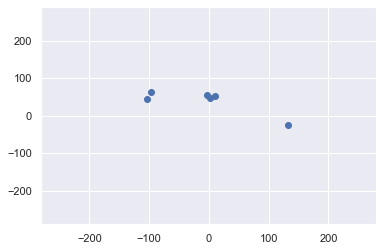

In [14]:
#Plotting graph
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-280,280)
plt.ylim(-290,290)
plt.show

In [16]:
#Storing only 2 and 3 columns from data in x
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [21]:
#Applying CLustering
Kmeans=KMeans(3)

In [23]:
Kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
identified_clusters=Kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [28]:
data_clusters=data.copy()
data_clusters['Clusters']=identified_clusters
data_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


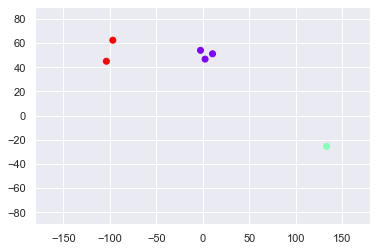

In [33]:
#plotting graph
plt.scatter(data_clusters['Longitude'],data_clusters['Latitude'],c=data_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [44]:
data_map=data.copy()
data_map['Language']=data_map['Language'].map({'English':0,'French':1,'German':2})
data_map

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [45]:
#For only 4 column in dataset
x=data_map.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [49]:
#Applying clustering
Kmeans=KMeans(2)
Kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
clusters=Kmeans.fit_predict(x)

In [67]:
data_map1=data_map.copy()
data_map1['CLUSTERS']=clusters

In [69]:
data_map1

,Country,Latitude,Longitude,Language,CLUSTERS
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


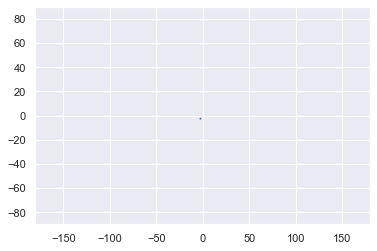

In [70]:
#Plotting graph
plt.scatter(data_map['Longitude'],data_map['Longitude'],data_map['CLUSTERS'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()